<a href="https://colab.research.google.com/github/skywalker0803r/deep-learning-ian-goodfellow/blob/master/%E4%B8%80%E9%8D%B5%E7%94%A2%E7%94%9F%E8%99%9B%E6%93%AC%E8%B2%A8%E5%B9%A3%E8%B2%B7%E8%B3%A3%E8%A8%8A%E8%99%9F(%E5%8A%A0%E5%85%A5MMI%E6%BF%BE%E7%B6%B2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 產生訊號

All caught up..!


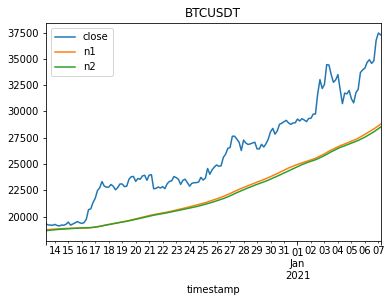

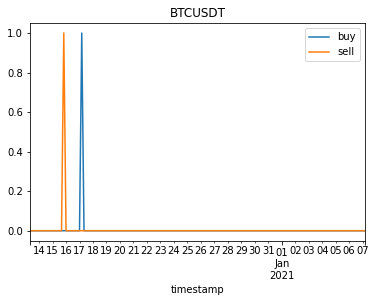

All caught up..!


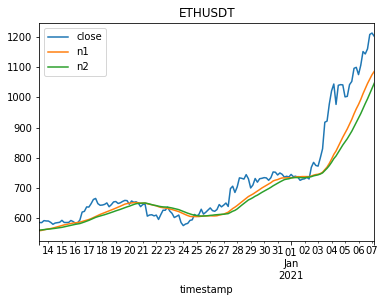

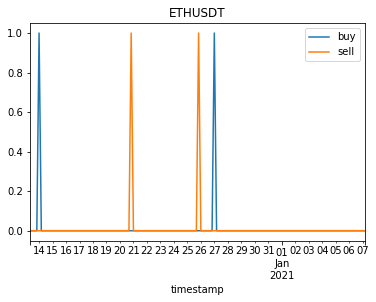

All caught up..!


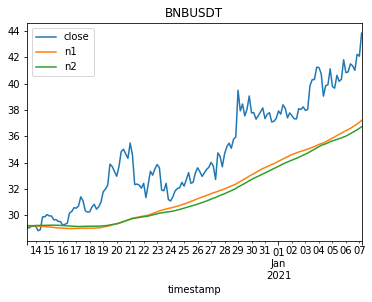

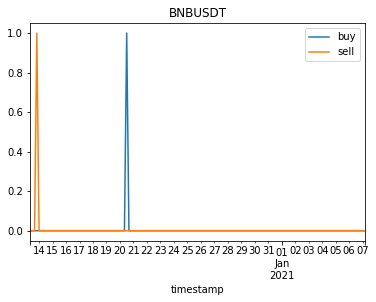

In [11]:
!pip install finlab_crypto > log.txt
import finlab_crypto
import matplotlib.pyplot as plt
import pandas as pd

# config
config = {}
config['BTC'] = {'n1':90,'n2':95,'mmi_timeperiod':25}
config['ETH'] = {'n1':20,'n2':25,'mmi_timeperiod':15}
config['BNB'] = {'n1':85,'n2':95,'mmi_timeperiod':40}
lookback = 150

for cname in config.keys():
  # 取得歷史價格數據
  pair = '{}USDT'.format(cname)
  ohlcv = finlab_crypto.crawler.get_all_binance(pair,'4h')
  table = pd.DataFrame()
  table['close'] = ohlcv.close
  
  #計算均線
  table['n1'] = ohlcv.close.rolling(config[cname]['n1']).mean()
  table['n2'] = ohlcv.close.rolling(config[cname]['n2']).mean()
  
  # 畫出均線圖
  table.tail(lookback).plot(title=pair)
  plt.show()
  
  # 產生買賣訊號
  table['buy'] = ((table['n1']>table['n2'])&(table['n1'].shift()<table['n2'].shift())).astype(int)
  table['sell'] = ((table['n1']<table['n2'])&(table['n1'].shift()>table['n2'].shift())).astype(int)
  
  # 加入MMI濾網
  median = ohlcv.close.rolling(config[cname]['mmi_timeperiod']).median()
  p1 = ohlcv.close > median
  p2 = ohlcv.close.shift() > median
  mmi = (p1 & p2).astype(int).rolling(config[cname]['mmi_timeperiod']).mean()
  table['buy'] = table['buy'] & (mmi > 0.5).astype(int)
  
  # 畫出買賣訊號
  table[['buy','sell']].tail(lookback).plot(title=pair)
  plt.show()